In [19]:
import pandas as pd
from pycaret.classification import *
import sys
sys.path.append('/opt/ml/code/src/')
from features import feature_engineering

In [23]:
df = pd.read_csv("/opt/ml/code/input/train.csv", parse_dates=["order_date"])
year_month = '2011-12'

In [24]:
x_train, test_setst, all_train, features = feature_engineering(df, year_month)

categorical feature: ['year_month-mode']
train_set.shape (5722, 123) , test_set.shape (5914, 123)


In [50]:
test_setst

,customer_id,year_month,sparta_order_ts-first,sparta_order_ts-last,month-mode,year_month-mode,order_ts-first,order_ts-last,order_ts_diff-mean,order_ts_diff-max,order_ts_diff-min,order_ts_diff-sum,order_ts_diff-count,order_ts_diff-std,order_ts_diff-skew,quantity_diff-mean,quantity_diff-max,quantity_diff-min,quantity_diff-sum,quantity_diff-count,quantity_diff-std,quantity_diff-skew,price_diff-mean,price_diff-max,price_diff-min,price_diff-sum,price_diff-count,price_diff-std,price_diff-skew,total_diff-mean,total_diff-max,total_diff-min,total_diff-sum,total_diff-count,total_diff-std,total_diff-skew,order_id-nunique,product_id-nunique,cumsum_total_by_cust_id-mean,cumsum_total_by_cust_id-max,...,cumsum_total_by_order_id-min,cumsum_total_by_order_id-sum,cumsum_total_by_order_id-count,cumsum_total_by_order_id-std,cumsum_total_by_order_id-skew,cumsum_quantity_by_order_id-mean,cumsum_quantity_by_order_id-max,cumsum_quantity_by_order_id-min,cumsum_quantity_by_order_id-sum,cumsum_quantity_by_order_id-count,cumsum_quantity_by_order_id-std,cumsum_quantity_by_order_id-skew,cumsum_price_by_order_id-mean,cumsum_price_by_order_id-max,cumsum_price_by_order_id-min,cumsum_price_by_order_id-sum,cumsum_price_by_order_id-count,cumsum_price_by_order_id-std,cumsum_price_by_order_id-skew,quantity-mean,quantity-max,quantity-min,quantity-sum,quantity-count,quantity-std,quantity-skew,price-mean,price-max,price-min,price-sum,price-count,price-std,price-skew,total-mean,total-max,total-min,total-sum,total-count,total-std,total-skew
0,12346,2011-12,1.295345e+09,1.295345e+09,6.0,6.0,1.260780e+09,1.295346e+09,2.756055e+07,1.260780e+09,0.0,1.295346e+09,47.0,1.838084e+08,6.853983,-1579.042553,74216.0,-148430.0,-74215.0,47.0,24415.912105,-4.260609,0.036511,182.3745,-233.1615,1.7160,47.0,56.268585,-0.857780,-2709.637021,127360.365,-254705.880,-127352.940,47.0,41898.130551,-4.260389,17.0,10.0,2953.304457,127267.5690,...,-127352.9400,1141.9650,47.0,26555.274233,-0.002867,3.914894,74215.0,-74215.0,184.0,47.0,15474.899161,-0.000793,80.737660,412.5990,1.6500,3794.6700,47.0,87.485676,1.486909,1.127660,74215.0,-74215.0,53.0,47.0,15474.897433,-0.000228,19.922872,234.8115,1.6500,936.3750,47.0,40.530554,4.547689,-1.816404,127352.9400,-127352.9400,-85.3710,47.0,26554.972603,0.000214
1,12347,2011-12,5.154139e+10,6.204300e+10,10.0,22.0,1.288535e+09,1.320064e+09,6.256227e+06,1.288535e+09,0.0,1.320064e+09,211.0,8.870072e+07,14.523534,0.028436,234.0,-228.0,6.0,211.0,24.445452,0.301448,0.015249,20.1300,-16.1700,3.2175,211.0,4.655454,0.826231,0.091493,382.635,-387.090,19.305,211.0,48.042863,0.034134,7.0,13.0,3491.749628,7749.5715,...,21.7800,132481.4535,211.0,493.241526,1.234591,224.853081,676.0,4.0,47444.0,211.0,160.673737,0.694310,71.500443,199.2540,0.9075,15086.5935,211.0,48.486089,0.663454,13.151659,240.0,2.0,2775.0,211.0,17.701647,10.216574,4.230803,21.0375,0.4125,892.6995,211.0,3.737299,2.511623,36.727827,411.8400,8.3160,7749.5715,211.0,36.057268,6.436852
2,12348,2011-12,2.571199e+10,3.950869e+09,9.0,9.0,1.285600e+09,1.316956e+09,2.582267e+07,1.285600e+09,0.0,1.316956e+09,51.0,1.799488e+08,7.139372,0.019608,138.0,-143.0,1.0,51.0,62.479273,0.044137,1.294118,65.5215,-65.5215,66.0000,51.0,24.173721,0.255176,1.294118,312.840,-327.096,66.000,51.0,83.064158,-0.085563,5.0,5.0,1096.986000,3332.0100,...,21.7800,19140.2640,51.0,300.618991,1.639190,388.392157,1254.0,24.0,19808.0,51.0,333.951917,1.339273,14.115588,81.8400,0.4785,719.8950,51.0,18.844181,2.593528,53.215686,144.0,1.0,2714.0,51.0,48.700848,0.822147,6.247353,66.0000,0.4785,318.6150,51.0,17.617275,3.224035,65.333529,396.0000,1.6500,3332.0100,51.0,72.939156,2.528198
3,12349,2011-12,5.853717e+10,9.649644e+10,11.0,23.0,1.259931e+09,1.321869e+09,7.343717e+06,1.259931e+09,0.0,1.321869e+09,180.0,9.392760e+07,13.397769,0.005556,36.0,-36.0,1.0,180.0,8.307295,-0.097683,2.750000,481.3875,-411.0975,495.0000,180.0,65.980547,1.909892,2.750000,440.550,-395.670,495.000,180.0,68.040274,1.347503,5.0,13.0,3445.769525,7267.4910,...,-39.8475,188591.

In [49]:
test_setst.drop(columns=['label'], inplace=True)

KeyError: "['label'] not found in axis"

In [45]:
exp1 = setup(data = x_train, target = 'label',
            ignore_features=[], use_gpu = True)

,Description,Value
0,session_id,1974
1,Target,label
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5722, 123)"
5,Missing Values,False
6,Numeric Features,121
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [47]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8292,0.8176,0.3905,0.6836,0.4952,0.4018,0.4256,6.8860
catboost,CatBoost Classifier,0.8290,0.8174,0.3800,0.6893,0.4883,0.3960,0.4221,6.9040
lda,Linear Discriminant Analysis,0.8217,0.8075,0.3488,0.6648,0.4551,0.3615,0.3894,0.1500
rf,Random Forest Classifier,0.8235,0.8016,0.3673,0.6634,0.4705,0.3756,0.4002,1.1350
et,Extra Trees Classifier,0.8187,0.8016,0.3534,0.6457,0.4546,0.3575,0.3818,1.1770
lightgbm,Light Gradient Boosting Machine,0.8235,0.7979,0.3882,0.6527,0.4852,0.3873,0.4071,0.4100
ada,Ada Boost Classifier,0.8187,0.7949,0.4020,0.6259,0.4883,0.3846,0.3992,1.4350
xgboost,Extreme Gradient Boosting,0.8205,0.7803,0.4009,0.6366,0.4879,0.3867,0.4037,1.1370
lr,Logistic Regression,0.8135,0.7770,0.2179,0.7240,0.3322,0.2597,0.3239,0.2190
nb,Naive Bayes,0.7950,0.7613,0.2965,0.5563,0.3740,0.2686,0.2933,0.0240


In [48]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8365,0.8249,0.4244,0.6952,0.5271,0.4351,0.4545
1,0.8390,0.8275,0.3488,0.7792,0.4819,0.4026,0.4483
2,0.8477,0.8402,0.4451,0.7476,0.5580,0.4730,0.4962
3,0.8215,0.7977,0.3468,0.6667,0.4563,0.3620,0.3897
4,0.8315,0.8255,0.3526,0.7262,0.4747,0.3884,0.4244
Mean,0.8352,0.8232,0.3836,0.7230,0.4996,0.4122,0.4426
SD,0.0086,0.0139,0.0424,0.0393,0.0373,0.0385,0.0352


In [52]:
predictions = predict_model(blended, data = test_setst)

In [53]:
predictions

,customer_id,year_month,sparta_order_ts-first,sparta_order_ts-last,month-mode,year_month-mode,order_ts-first,order_ts-last,order_ts_diff-mean,order_ts_diff-max,order_ts_diff-min,order_ts_diff-sum,order_ts_diff-count,order_ts_diff-std,order_ts_diff-skew,quantity_diff-mean,quantity_diff-max,quantity_diff-min,quantity_diff-sum,quantity_diff-count,quantity_diff-std,quantity_diff-skew,price_diff-mean,price_diff-max,price_diff-min,price_diff-sum,price_diff-count,price_diff-std,price_diff-skew,total_diff-mean,total_diff-max,total_diff-min,total_diff-sum,total_diff-count,total_diff-std,total_diff-skew,order_id-nunique,product_id-nunique,cumsum_total_by_cust_id-mean,cumsum_total_by_cust_id-max,...,cumsum_total_by_order_id-count,cumsum_total_by_order_id-std,cumsum_total_by_order_id-skew,cumsum_quantity_by_order_id-mean,cumsum_quantity_by_order_id-max,cumsum_quantity_by_order_id-min,cumsum_quantity_by_order_id-sum,cumsum_quantity_by_order_id-count,cumsum_quantity_by_order_id-std,cumsum_quantity_by_order_id-skew,cumsum_price_by_order_id-mean,cumsum_price_by_order_id-max,cumsum_price_by_order_id-min,cumsum_price_by_order_id-sum,cumsum_price_by_order_id-count,cumsum_price_by_order_id-std,cumsum_price_by_order_id-skew,quantity-mean,quantity-max,quantity-min,quantity-sum,quantity-count,quantity-std,quantity-skew,price-mean,price-max,price-min,price-sum,price-count,price-std,price-skew,total-mean,total-max,total-min,total-sum,total-count,total-std,total-skew,Label,Score
0,12346,2011-12,1.295345e+09,1.295345e+09,6.0,6.0,1.260780e+09,1.295346e+09,2.756055e+07,1.260780e+09,0.0,1.295346e+09,47.0,1.838084e+08,6.853983,-1579.042553,74216.0,-148430.0,-74215.0,47.0,24415.912105,-4.260609,0.036511,182.3745,-233.1615,1.7160,47.0,56.268585,-0.857780,-2709.637021,127360.365,-254705.880,-127352.940,47.0,41898.130551,-4.260389,17.0,10.0,2953.304457,127267.5690,...,47.0,26555.274233,-0.002867,3.914894,74215.0,-74215.0,184.0,47.0,15474.899161,-0.000793,80.737660,412.5990,1.6500,3794.6700,47.0,87.485676,1.486909,1.127660,74215.0,-74215.0,53.0,47.0,15474.897433,-0.000228,19.922872,234.8115,1.6500,936.3750,47.0,40.530554,4.547689,-1.816404,127352.9400,-127352.9400,-85.3710,47.0,26554.972603,0.000214,0,0.9705
1,12347,2011-12,5.154139e+10,6.204300e+10,10.0,22.0,1.288535e+09,1.320064e+09,6.256227e+06,1.288535e+09,0.0,1.320064e+09,211.0,8.870072e+07,14.523534,0.028436,234.0,-228.0,6.0,211.0,24.445452,0.301448,0.015249,20.1300,-16.1700,3.2175,211.0,4.655454,0.826231,0.091493,382.635,-387.090,19.305,211.0,48.042863,0.034134,7.0,13.0,3491.749628,7749.5715,...,211.0,493.241526,1.234591,224.853081,676.0,4.0,47444.0,211.0,160.673737,0.694310,71.500443,199.2540,0.9075,15086.5935,211.0,48.486089,0.663454,13.151659,240.0,2.0,2775.0,211.0,17.701647,10.216574,4.230803,21.0375,0.4125,892.6995,211.0,3.737299,2.511623,36.727827,411.8400,8.3160,7749.5715,211.0,36.057268,6.436852,0,0.6706
2,12348,2011-12,2.571199e+10,3.950869e+09,9.0,9.0,1.285600e+09,1.316956e+09,2.582267e+07,1.285600e+09,0.0,1.316956e+09,51.0,1.799488e+08,7.139372,0.019608,138.0,-143.0,1.0,51.0,62.479273,0.044137,1.294118,65.5215,-65.5215,66.0000,51.0,24.173721,0.255176,1.294118,312.840,-327.096,66.000,51.0,83.064158,-0.085563,5.0,5.0,1096.986000,3332.0100,...,51.0,300.618991,1.639190,388.392157,1254.0,24.0,19808.0,51.0,333.951917,1.339273,14.115588,81.8400,0.4785,719.8950,51.0,18.844181,2.593528,53.215686,144.0,1.0,2714.0,51.0,48.700848,0.822147,6.247353,66.0000,0.4785,318.6150,51.0,17.617275,3.224035,65.333529,396.0000,1.6500,3332.0100,51.0,72.939156,2.528198,0,0.8840
3,12349,2011-12,5.853717e+10,9.649644e+10,11.0,23.0,1.259931e+09,1.321869e+09,7.343717e+06,1.259931e+09,0.0,1.321869e+09,180.0,9.392760e+07,13.397769,0.005556,36.0,-36.0,1.0,180.0,8.307295,-0.097683,2.750000,481.3875,-411.0975,495.0000,180.0,65.980547,1.909892,2.750000,440.550,-395.670,495.000,180.0,68.040274,1.347503,5.0,13.0,3445.769525,7267.4910,...,180.0,702.269836,0.211401,241.211111,631.0,-5.0,43418.0,180.0,159.079439,0.475933,266.709758,998.

In [7]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8030,0.8190,0.2706,0.5750,0.3680,0.2688,0.2957
1,0.8105,0.7863,0.2824,0.6154,0.3871,0.2928,0.3240
2,0.8354,0.7821,0.3059,0.7879,0.4407,0.3654,0.4220
3,0.8404,0.8181,0.3647,0.7561,0.4921,0.4108,0.4493
4,0.8254,0.8124,0.3059,0.7027,0.4262,0.3416,0.3828
5,0.8375,0.8223,0.3810,0.7111,0.4961,0.4096,0.4380
6,0.8300,0.8280,0.3810,0.6667,0.4848,0.3920,0.4140
7,0.8475,0.8335,0.4167,0.7447,0.5344,0.4517,0.4790
8,0.8250,0.8268,0.4118,0.6364,0.5000,0.3998,0.4137
9,0.8250,0.8191,0.3882,0.6471,0.4853,0.3877,0.4061


In [9]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8080,0.8149,0.3176,0.5870,0.4122,0.3094,0.3303
1,0.8005,0.8026,0.2941,0.5556,0.3846,0.2788,0.2989
2,0.8304,0.7776,0.3529,0.6977,0.4688,0.3805,0.4119
3,0.8479,0.8169,0.4824,0.7069,0.5734,0.4848,0.4980
4,0.8404,0.8208,0.3882,0.7333,0.5077,0.4230,0.4535
5,0.8350,0.8239,0.4048,0.6800,0.5075,0.4159,0.4361
6,0.8425,0.8462,0.4048,0.7234,0.5191,0.4338,0.4599
7,0.8475,0.8159,0.4405,0.7255,0.5481,0.4629,0.4838
8,0.8325,0.8285,0.4588,0.6500,0.5379,0.4393,0.4493
9,0.8375,0.7876,0.4118,0.7000,0.5185,0.4286,0.4504


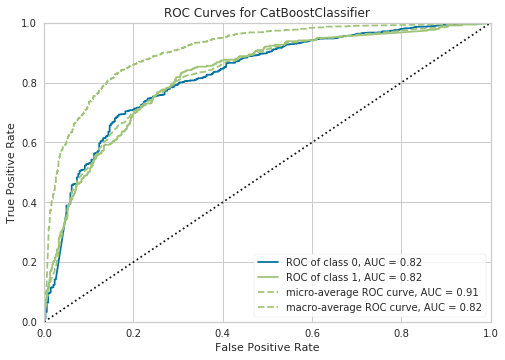

In [11]:
plot_model(estimator = tuned_catboost, plot = 'auc')

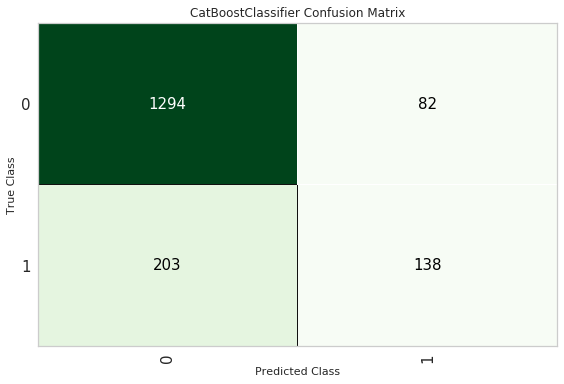

In [12]:
plot_model(estimator = tuned_catboost, plot = 'confusion_matrix')

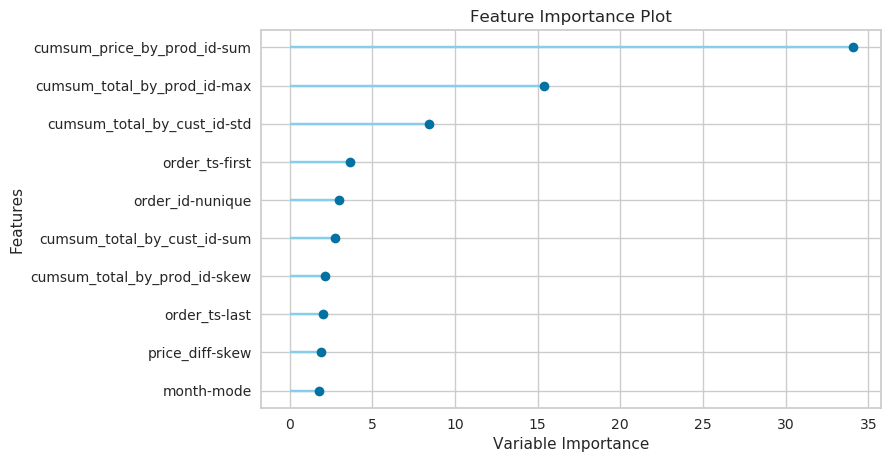

In [13]:
plot_model(estimator = tuned_catboost, plot = 'feature')

In [1]:
evaluate_model(tuned_catboost)

NameError: name 'evaluate_model' is not defined

In [34]:
test_setst.drop(columns=['label'], inplace=True)

In [35]:
test_setst

,customer_id,year_month,sparta_order_ts-first,sparta_order_ts-last,month-mode,year_month-mode,order_ts-first,order_ts-last,order_ts_diff-mean,order_ts_diff-max,order_ts_diff-min,order_ts_diff-sum,order_ts_diff-count,order_ts_diff-std,order_ts_diff-skew,quantity_diff-mean,quantity_diff-max,quantity_diff-min,quantity_diff-sum,quantity_diff-count,quantity_diff-std,quantity_diff-skew,price_diff-mean,price_diff-max,price_diff-min,price_diff-sum,price_diff-count,price_diff-std,price_diff-skew,total_diff-mean,total_diff-max,total_diff-min,total_diff-sum,total_diff-count,total_diff-std,total_diff-skew,order_id-nunique,product_id-nunique,cumsum_total_by_cust_id-mean,cumsum_total_by_cust_id-max,...,cumsum_total_by_order_id-min,cumsum_total_by_order_id-sum,cumsum_total_by_order_id-count,cumsum_total_by_order_id-std,cumsum_total_by_order_id-skew,cumsum_quantity_by_order_id-mean,cumsum_quantity_by_order_id-max,cumsum_quantity_by_order_id-min,cumsum_quantity_by_order_id-sum,cumsum_quantity_by_order_id-count,cumsum_quantity_by_order_id-std,cumsum_quantity_by_order_id-skew,cumsum_price_by_order_id-mean,cumsum_price_by_order_id-max,cumsum_price_by_order_id-min,cumsum_price_by_order_id-sum,cumsum_price_by_order_id-count,cumsum_price_by_order_id-std,cumsum_price_by_order_id-skew,quantity-mean,quantity-max,quantity-min,quantity-sum,quantity-count,quantity-std,quantity-skew,price-mean,price-max,price-min,price-sum,price-count,price-std,price-skew,total-mean,total-max,total-min,total-sum,total-count,total-std,total-skew
0,12346,2011-12,1.295345e+09,1.295345e+09,6.0,6.0,1.260780e+09,1.295346e+09,2.756055e+07,1.260780e+09,0.0,1.295346e+09,47.0,1.838084e+08,6.853983,-1579.042553,74216.0,-148430.0,-74215.0,47.0,24415.912105,-4.260609,0.036511,182.3745,-233.1615,1.7160,47.0,56.268585,-0.857780,-2709.637021,127360.365,-254705.880,-127352.940,47.0,41898.130551,-4.260389,17.0,10.0,2953.304457,127267.5690,...,-127352.9400,1141.9650,47.0,26555.274233,-0.002867,3.914894,74215.0,-74215.0,184.0,47.0,15474.899161,-0.000793,80.737660,412.5990,1.6500,3794.6700,47.0,87.485676,1.486909,1.127660,74215.0,-74215.0,53.0,47.0,15474.897433,-0.000228,19.922872,234.8115,1.6500,936.3750,47.0,40.530554,4.547689,-1.816404,127352.9400,-127352.9400,-85.3710,47.0,26554.972603,0.000214
1,12347,2011-12,5.154139e+10,6.204300e+10,10.0,22.0,1.288535e+09,1.320064e+09,6.256227e+06,1.288535e+09,0.0,1.320064e+09,211.0,8.870072e+07,14.523534,0.028436,234.0,-228.0,6.0,211.0,24.445452,0.301448,0.015249,20.1300,-16.1700,3.2175,211.0,4.655454,0.826231,0.091493,382.635,-387.090,19.305,211.0,48.042863,0.034134,7.0,13.0,3491.749628,7749.5715,...,21.7800,132481.4535,211.0,493.241526,1.234591,224.853081,676.0,4.0,47444.0,211.0,160.673737,0.694310,71.500443,199.2540,0.9075,15086.5935,211.0,48.486089,0.663454,13.151659,240.0,2.0,2775.0,211.0,17.701647,10.216574,4.230803,21.0375,0.4125,892.6995,211.0,3.737299,2.511623,36.727827,411.8400,8.3160,7749.5715,211.0,36.057268,6.436852
2,12348,2011-12,2.571199e+10,3.950869e+09,9.0,9.0,1.285600e+09,1.316956e+09,2.582267e+07,1.285600e+09,0.0,1.316956e+09,51.0,1.799488e+08,7.139372,0.019608,138.0,-143.0,1.0,51.0,62.479273,0.044137,1.294118,65.5215,-65.5215,66.0000,51.0,24.173721,0.255176,1.294118,312.840,-327.096,66.000,51.0,83.064158,-0.085563,5.0,5.0,1096.986000,3332.0100,...,21.7800,19140.2640,51.0,300.618991,1.639190,388.392157,1254.0,24.0,19808.0,51.0,333.951917,1.339273,14.115588,81.8400,0.4785,719.8950,51.0,18.844181,2.593528,53.215686,144.0,1.0,2714.0,51.0,48.700848,0.822147,6.247353,66.0000,0.4785,318.6150,51.0,17.617275,3.224035,65.333529,396.0000,1.6500,3332.0100,51.0,72.939156,2.528198
3,12349,2011-12,5.853717e+10,9.649644e+10,11.0,23.0,1.259931e+09,1.321869e+09,7.343717e+06,1.259931e+09,0.0,1.321869e+09,180.0,9.392760e+07,13.397769,0.005556,36.0,-36.0,1.0,180.0,8.307295,-0.097683,2.750000,481.3875,-411.0975,495.0000,180.0,65.980547,1.909892,2.750000,440.550,-395.670,495.000,180.0,68.040274,1.347503,5.0,13.0,3445.769525,7267.4910,...,-39.8475,188591.

In [36]:
cat_final = finalize_model(tuned_catboost)
final_df = predict_model(cat_final, test_setst)

In [37]:
final_df

,customer_id,year_month,sparta_order_ts-first,sparta_order_ts-last,month-mode,year_month-mode,order_ts-first,order_ts-last,order_ts_diff-mean,order_ts_diff-max,order_ts_diff-min,order_ts_diff-sum,order_ts_diff-count,order_ts_diff-std,order_ts_diff-skew,quantity_diff-mean,quantity_diff-max,quantity_diff-min,quantity_diff-sum,quantity_diff-count,quantity_diff-std,quantity_diff-skew,price_diff-mean,price_diff-max,price_diff-min,price_diff-sum,price_diff-count,price_diff-std,price_diff-skew,total_diff-mean,total_diff-max,total_diff-min,total_diff-sum,total_diff-count,total_diff-std,total_diff-skew,order_id-nunique,product_id-nunique,cumsum_total_by_cust_id-mean,cumsum_total_by_cust_id-max,...,cumsum_total_by_order_id-count,cumsum_total_by_order_id-std,cumsum_total_by_order_id-skew,cumsum_quantity_by_order_id-mean,cumsum_quantity_by_order_id-max,cumsum_quantity_by_order_id-min,cumsum_quantity_by_order_id-sum,cumsum_quantity_by_order_id-count,cumsum_quantity_by_order_id-std,cumsum_quantity_by_order_id-skew,cumsum_price_by_order_id-mean,cumsum_price_by_order_id-max,cumsum_price_by_order_id-min,cumsum_price_by_order_id-sum,cumsum_price_by_order_id-count,cumsum_price_by_order_id-std,cumsum_price_by_order_id-skew,quantity-mean,quantity-max,quantity-min,quantity-sum,quantity-count,quantity-std,quantity-skew,price-mean,price-max,price-min,price-sum,price-count,price-std,price-skew,total-mean,total-max,total-min,total-sum,total-count,total-std,total-skew,Label,Score
0,12346,2011-12,1.295345e+09,1.295345e+09,6.0,6.0,1.260780e+09,1.295346e+09,2.756055e+07,1.260780e+09,0.0,1.295346e+09,47.0,1.838084e+08,6.853983,-1579.042553,74216.0,-148430.0,-74215.0,47.0,24415.912105,-4.260609,0.036511,182.3745,-233.1615,1.7160,47.0,56.268585,-0.857780,-2709.637021,127360.365,-254705.880,-127352.940,47.0,41898.130551,-4.260389,17.0,10.0,2953.304457,127267.5690,...,47.0,26555.274233,-0.002867,3.914894,74215.0,-74215.0,184.0,47.0,15474.899161,-0.000793,80.737660,412.5990,1.6500,3794.6700,47.0,87.485676,1.486909,1.127660,74215.0,-74215.0,53.0,47.0,15474.897433,-0.000228,19.922872,234.8115,1.6500,936.3750,47.0,40.530554,4.547689,-1.816404,127352.9400,-127352.9400,-85.3710,47.0,26554.972603,0.000214,0,0.9579
1,12347,2011-12,5.154139e+10,6.204300e+10,10.0,22.0,1.288535e+09,1.320064e+09,6.256227e+06,1.288535e+09,0.0,1.320064e+09,211.0,8.870072e+07,14.523534,0.028436,234.0,-228.0,6.0,211.0,24.445452,0.301448,0.015249,20.1300,-16.1700,3.2175,211.0,4.655454,0.826231,0.091493,382.635,-387.090,19.305,211.0,48.042863,0.034134,7.0,13.0,3491.749628,7749.5715,...,211.0,493.241526,1.234591,224.853081,676.0,4.0,47444.0,211.0,160.673737,0.694310,71.500443,199.2540,0.9075,15086.5935,211.0,48.486089,0.663454,13.151659,240.0,2.0,2775.0,211.0,17.701647,10.216574,4.230803,21.0375,0.4125,892.6995,211.0,3.737299,2.511623,36.727827,411.8400,8.3160,7749.5715,211.0,36.057268,6.436852,0,0.5746
2,12348,2011-12,2.571199e+10,3.950869e+09,9.0,9.0,1.285600e+09,1.316956e+09,2.582267e+07,1.285600e+09,0.0,1.316956e+09,51.0,1.799488e+08,7.139372,0.019608,138.0,-143.0,1.0,51.0,62.479273,0.044137,1.294118,65.5215,-65.5215,66.0000,51.0,24.173721,0.255176,1.294118,312.840,-327.096,66.000,51.0,83.064158,-0.085563,5.0,5.0,1096.986000,3332.0100,...,51.0,300.618991,1.639190,388.392157,1254.0,24.0,19808.0,51.0,333.951917,1.339273,14.115588,81.8400,0.4785,719.8950,51.0,18.844181,2.593528,53.215686,144.0,1.0,2714.0,51.0,48.700848,0.822147,6.247353,66.0000,0.4785,318.6150,51.0,17.617275,3.224035,65.333529,396.0000,1.6500,3332.0100,51.0,72.939156,2.528198,0,0.9494
3,12349,2011-12,5.853717e+10,9.649644e+10,11.0,23.0,1.259931e+09,1.321869e+09,7.343717e+06,1.259931e+09,0.0,1.321869e+09,180.0,9.392760e+07,13.397769,0.005556,36.0,-36.0,1.0,180.0,8.307295,-0.097683,2.750000,481.3875,-411.0975,495.0000,180.0,65.980547,1.909892,2.750000,440.550,-395.670,495.000,180.0,68.040274,1.347503,5.0,13.0,3445.769525,7267.4910,...,180.0,702.269836,0.211401,241.211111,631.0,-5.0,43418.0,180.0,159.079439,0.475933,266.709758,998.

In [42]:
final_df.Score

0       0.9579
1       0.5746
2       0.9494
3       0.7131
4       0.8980
         ...  
5909    0.5359
5910    0.9818
5911    0.9878
5912    0.9837
5913    0.9291
Name: Score, Length: 5914, dtype: float64

In [44]:
MODEL = 'catboost'
FILE_NAME = 'all'

# 테스트 결과 제출 파일 읽기
sub = pd.read_csv('/opt/ml/code/input/sample_submission.csv')

# 테스트 예측 결과 저장
sub["probability"] = final_df.Score

# 제출 파일 쓰기
output_dir = '/opt/ml/code/output/pycaret_result/'
sub.to_csv(
    os.path.join(output_dir, f"{MODEL}_{FILE_NAME}.csv"), index=False
)